In [149]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbour
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
# Getting info about the dataset such as - number of rows, cols, datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [96]:
#check for number of rows and cols
print("No. of Rows: ", df.shape[0])
print("No. of Cols: ", df.shape[1])

No. of Rows:  150
No. of Cols:  5


In [97]:
# Check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [98]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [99]:
# Check unique values for each variable
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


In [100]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
unique_species = df['species'].unique()
print(unique_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [102]:
iris = df
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


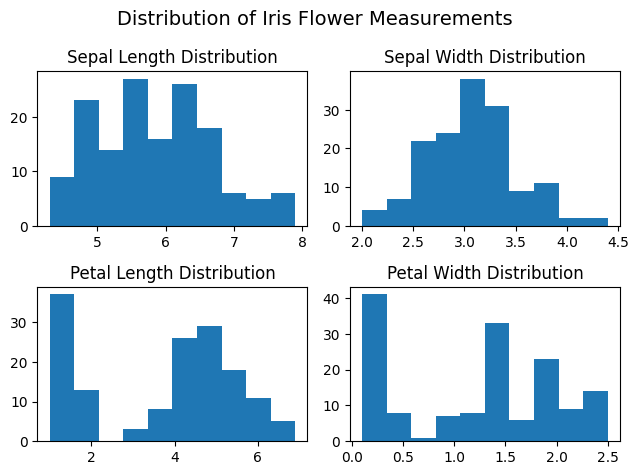

In [103]:
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(iris['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(iris['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(iris['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(iris['petal_width'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

In [104]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

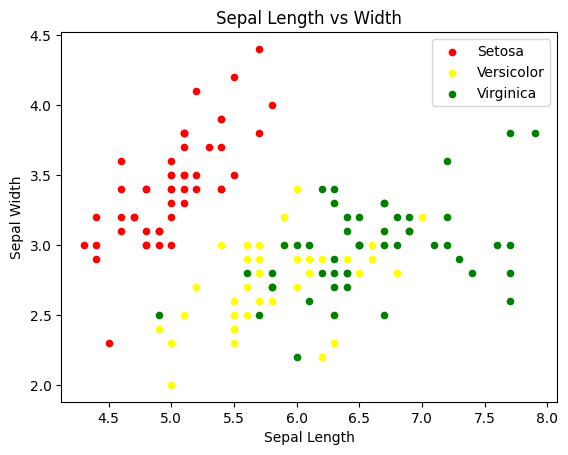

In [105]:
fig = iris[iris.species == 'Iris-setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='red', label='Setosa')
iris[iris.species == 'Iris-versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='yellow', label='Versicolor', ax=fig)
iris[iris.species == 'Iris-virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Virginica', ax=fig)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')

plt.legend()
plt.show()

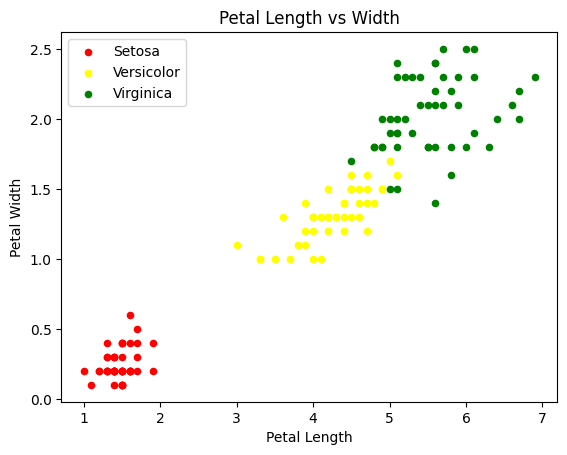

In [106]:
fig = iris[iris.species == 'Iris-setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='red', label='Setosa')
iris[iris.species == 'Iris-versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='yellow', label='Versicolor', ax=fig)
iris[iris.species == 'Iris-virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Virginica', ax=fig)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')

plt.legend()
plt.show()

In [107]:
numeric_df = iris.select_dtypes(include=['float64', 'int64'])

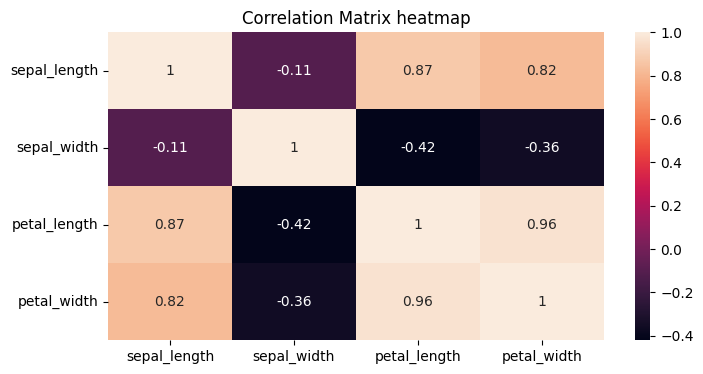

In [108]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix heatmap')
plt.show()

#### Observation:
- Petal width and length are highly correlated.
- Sepal width and length are not correlated.
- Sepal length and Petal length are strongly correlated.

## Splitting The Data into Training and Testing Dataset

In [109]:
x = iris.drop(columns=['species'], axis=1)
y = iris['species']

In [110]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.2)

In [111]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
45,4.8,3.0,1.4,0.3
27,5.2,3.5,1.5,0.2
37,4.9,3.1,1.5,0.1
55,5.7,2.8,4.5,1.3


In [112]:
y_test.head()

17         Iris-setosa
110     Iris-virginica
56     Iris-versicolor
12         Iris-setosa
122     Iris-virginica
Name: species, dtype: object

### ML Model

In [130]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Confusion Matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [135]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### Logistic Regression


Confusion Matrix:


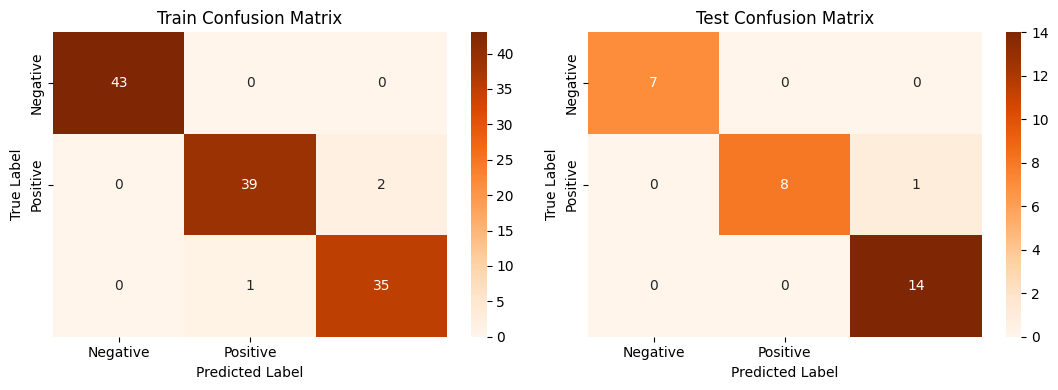


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |    43     |
| Iris-versicolor |    0.975    | 0.95122  |   0.962963 |    41     |
| Iris-virginica  |    0.945946 | 0.972222 |   0.958904 |    36     |
| accuracy        |    0.975    | 0.975    |   0.975    |     0.975 |
| macro avg       |    0.973649 | 0.974481 |   0.973956 |   120     |
| weighted avg    |    0.975242 | 0.975    |   0.975017 |   120     |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  7        |
| Iris-versicolor |    1        | 0.888889 |   0.941176 |  9        |
| Iris-virginica  |    0.933333 | 1        |   0.965517 | 14        |
| accuracy        |    0.966667

In [132]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [136]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.975242
Precision Test,0.968889
Recall Train,0.975000
Recall Test,0.966667
Accuracy Train,0.975000
Accuracy Test,0.966667
F1 macro Train,0.975017
F1 macro Test,0.966261


### SVM


Confusion Matrix:


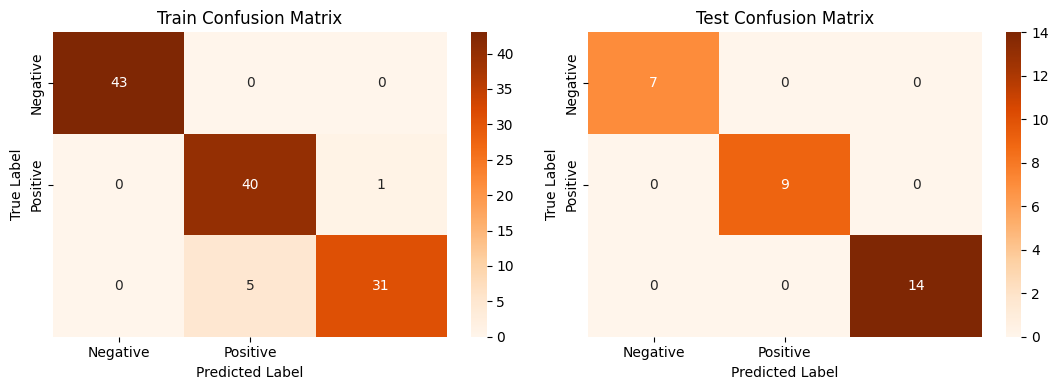


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     43    |
| Iris-versicolor |    0.888889 | 0.97561  |   0.930233 |     41    |
| Iris-virginica  |    0.96875  | 0.861111 |   0.911765 |     36    |
| accuracy        |    0.95     | 0.95     |   0.95     |      0.95 |
| macro avg       |    0.952546 | 0.945574 |   0.947332 |    120    |
| weighted avg    |    0.952662 | 0.95     |   0.949692 |    120    |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |         7 |
| Iris-versicolor |           1 |        1 |          1 |         9 |
| Iris-virginica  |           1 |        1 |          1 |        14 |
| accuracy        |           1

In [144]:
svm_model = SVC()
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [146]:
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,SVM
Precision Train,0.975242,1.000000,0.952662
Precision Test,0.968889,0.968889,1.000000
Recall Train,0.975000,1.000000,0.950000
Recall Test,0.966667,0.966667,1.000000
Accuracy Train,0.975000,1.000000,0.950000
Accuracy Test,0.966667,0.966667,1.000000
F1 macro Train,0.975017,1.000000,0.949692
F1 macro Test,0.966261,0.966261,1.000000


### Decision Tree


Confusion Matrix:


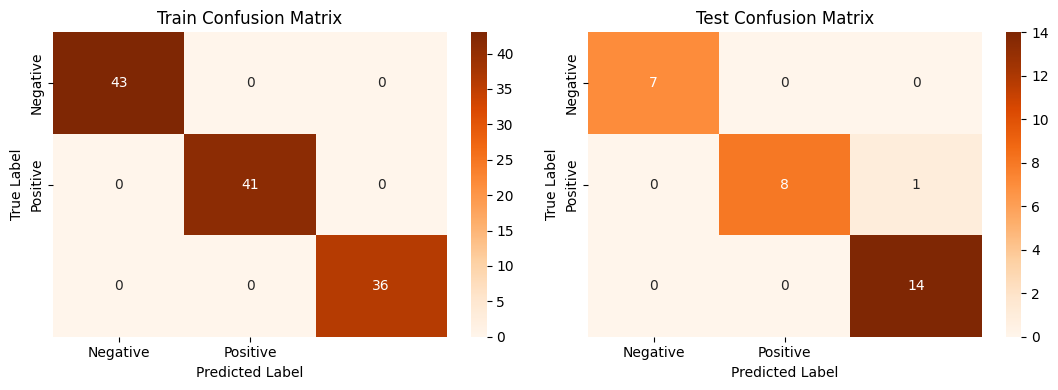


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        43 |
| Iris-versicolor |           1 |        1 |          1 |        41 |
| Iris-virginica  |           1 |        1 |          1 |        36 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       120 |
| weighted avg    |           1 |        1 |          1 |       120 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  7        |
| Iris-versicolor |    1        | 0.888889 |   0.941176 |  9        |
| Iris-virginica  |    0.933333 | 1        |   0.965517 | 14        |
| accuracy        |    0.966667

In [137]:
dt_model = DecisionTreeClassifier()
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [138]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.975242,1.000000
Precision Test,0.968889,0.968889
Recall Train,0.975000,1.000000
Recall Test,0.966667,0.966667
Accuracy Train,0.975000,1.000000
Accuracy Test,0.966667,0.966667
F1 macro Train,0.975017,1.000000
F1 macro Test,0.966261,0.966261


### Naive Bayes


Confusion Matrix:


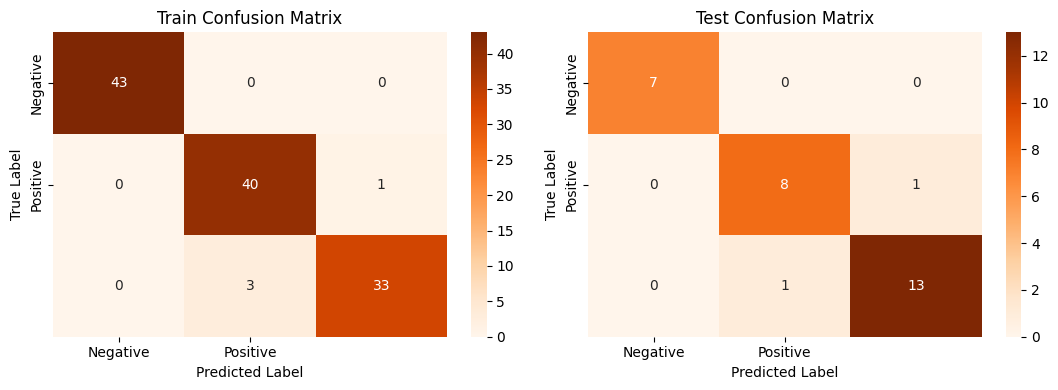


Train Classification Report:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  43        |
| Iris-versicolor |    0.930233 | 0.97561  |   0.952381 |  41        |
| Iris-virginica  |    0.970588 | 0.916667 |   0.942857 |  36        |
| accuracy        |    0.966667 | 0.966667 |   0.966667 |   0.966667 |
| macro avg       |    0.96694  | 0.964092 |   0.965079 | 120        |
| weighted avg    |    0.967339 | 0.966667 |   0.966587 | 120        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  7        |
| Iris-versicolor |    0.888889 | 0.888889 |   0.888889 |  9        |
| Iris-virginica  |    0.928571 | 0.928571 |   0.928571 | 14        |
| accuracy        |    

In [147]:
nb_model = GaussianNB()
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [148]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Decision Tree,SVM,Naive Bayes
Precision Train,0.975242,1.000000,0.952662,0.967339
Precision Test,0.968889,0.968889,1.000000,0.933333
Recall Train,0.975000,1.000000,0.950000,0.966667
Recall Test,0.966667,0.966667,1.000000,0.933333
Accuracy Train,0.975000,1.000000,0.950000,0.966667
Accuracy Test,0.966667,0.966667,1.000000,0.933333
F1 macro Train,0.975017,1.000000,0.949692,0.966587
F1 macro Test,0.966261,0.966261,1.000000,0.933333
